# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


Поздравляем, ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на 2021 год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

Не стесняйся оставлять свои комментарии и заметки с рекомендациями для руководителя относительно данных, которые видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

In [3]:
workouts_users

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id,first_contact_datetime,age,free_workout_datetime,first_payment_datetime,workouts_successful,workouts_total,months_active,user_id,region,geo_group
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104688,30976738,750.0,2020-11-19 08:00:00,success,single,4831015,active,general,Spartacus,6684752,2020-08-17 21:47:07,34.0,2020-08-18 09:00:00,2020-08-18 09:36:11,29,33,5,4831015,Республика Башкортостан,Регионы РФ
104689,31118199,750.0,2020-11-21 11:00:00,success,regular,4831015,active,general,Spartacus,6684752,2020-08-17 21:47:07,34.0,2020-08-18 09:00:00,2020-08-18 09:36:11,29,33,5,4831015,Республика Башкортостан,Регионы РФ
104690,31118238,750.0,2020-11-26 08:00:00,success,single,4831015,active,general,Spartacus,6684752,2020-08-17 21:47:07,34.0,2020-08-18 09:00:00,2020-08-18 09:36:11,29,33,5,4831015,Республика Башкортостан,Регионы РФ
104691,31600293,750.0,2020-12-03 08:00:00,success,regular,4831015,active,general,Spartacus,6684752,2020-08-17 21:47:07,34.0,2020-08-18 09:00:00,2020-08-18 09:36:11,29,33,5,4831015,Республика Башкортостан,Регионы РФ


In [4]:
workouts_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104693 entries, 0 to 104692
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   workout_id              104693 non-null  int64         
 1   cost                    100012 non-null  float64       
 2   start_at                104693 non-null  datetime64[ns]
 3   status                  104693 non-null  object        
 4   workout_schedule_type   104693 non-null  object        
 5   client_id               104693 non-null  int64         
 6   client_status           100362 non-null  object        
 7   workout_type            104693 non-null  object        
 8   trainer_department      104676 non-null  object        
 9   trainer_id              104693 non-null  int64         
 10  first_contact_datetime  104693 non-null  object        
 11  age                     59439 non-null   float64       
 12  free_workout_datetime   60741 

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом workouts.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную trainings_by_day.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси X 
    - подпись оси Y 
4. Удали неполные данные, которые мешают анализу.

## Решение

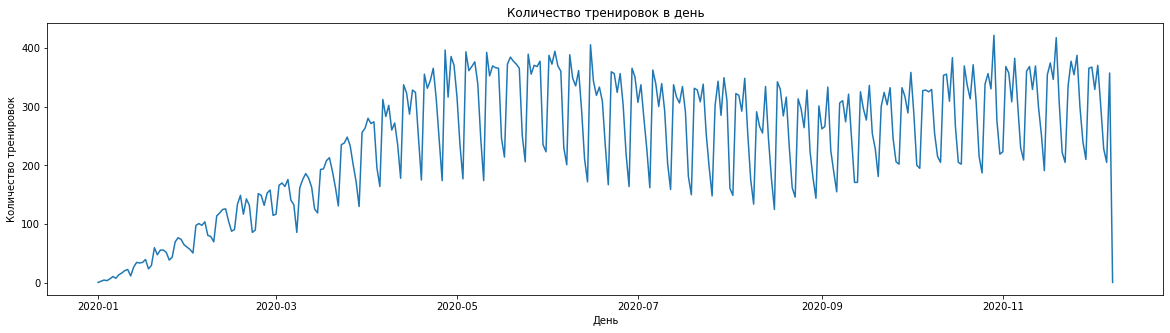

In [5]:
trainings_by_day = (workouts[workouts['status'] == 'success']. # оставляем только те тренировки, которые состоялись
                    resample('d', on='start_at'). # группируем по дням
                    count()[['workout_id']]) # и считаем их количество 

plt.figure(figsize=(20,5))
plt.plot(trainings_by_day['workout_id'])
plt.title('Количество тренировок в день')
plt.xlabel('День')
plt.ylabel('Количество тренировок')
plt.show()

Можно видеть, что:
1. Количество посещений растёт с начала года линейно и выходит к локальному максимуму в мае (возможно люди хотят набрать форму к лету);
2. В период с июня по сентябрь наблюдается некоторый спад в количестве посещений (возможно это связано с периодом отпусков);
3. С сентября по ноябрь вновь наблюдается рост посещений до майского уровня;
4. Количетсво посещений в выходные дни ощутимо меньше чем в будние - на графике можно видеть соответствующие "падения" графика.

## Задание 2

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью dt.weekday
    - добавили столбец с названием дня недели с помощью dt.day_name()
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси X
    - подпись оси Y
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [6]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

,workout_id
start_at,
2020-01-01,1
2020-01-02,3
2020-01-03,5
2020-01-04,4
2020-01-05,7
...,...
2020-12-04,301
2020-12-05,228
2020-12-06,205


In [7]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,2,Wednesday
1,2020-01-02,3,3,Thursday
2,2020-01-03,5,4,Friday
3,2020-01-04,4,5,Saturday
4,2020-01-05,7,6,Sunday
...,...,...,...,...
338,2020-12-04,301,4,Friday
339,2020-12-05,228,5,Saturday
340,2020-12-06,205,6,Sunday
341,2020-12-07,357,0,Monday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [8]:
trainings_by_day_frame['week_day_num'] += 1

## Решение

In [9]:
week_day_and_num = trainings_by_day_frame.drop(columns=['workouts_date', 'workouts']).drop_duplicates()

trainings_by_week_day = (trainings_by_day_frame.groupby('week_day_num').mean()[['workouts']]. 
                            # считаем среднее для каждого дня
                         round({'workouts': 1}). 
                            # округляем до одного знака после запятой
                         reset_index().join(week_day_and_num.set_index('week_day_num'), on='week_day_num')) 
                            # "присоединяем" столбец с названиями дней, чтобы использовать его при визуализации

trainings_by_week_day

,week_day_num,workouts,week_day_name
0,1,290.2,Monday
1,2,274.8,Tuesday
2,3,262.5,Wednesday
3,4,288.3,Thursday
4,5,241.2,Friday
5,6,180.0,Saturday
6,7,151.5,Sunday


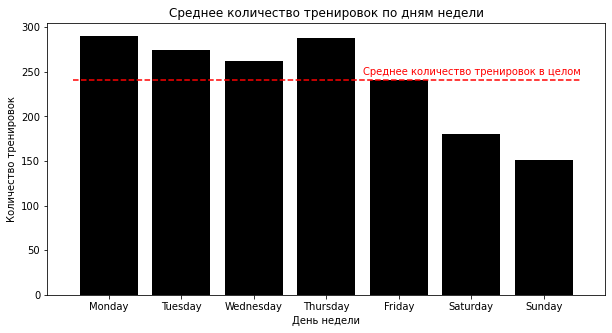

In [10]:
workouts_mean = trainings_by_week_day['workouts'].mean()

plt.figure(figsize=(10,5))

plt.bar(trainings_by_week_day['week_day_name'], trainings_by_week_day['workouts'], color = 'k')

plt.title('Среднее количество тренировок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество тренировок')

plt.hlines(workouts_mean, -0.5, 6.5, colors='r', linestyles='dashed')
plt.text(3.5, workouts_mean + 5, 'Среднее количество тренировок в целом', color = 'r')

plt.show()

Можно видеть, что в выходные тренировок меньше, чем в среднем.

## Задание 3

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. Для каждого департамента: 

    - отфильтруй по trainer_department тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

*Можешь воспользоваться циклом for из раздела Extra занятия.*

**Подготовим данные**


In [11]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [12]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [13]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8
...,...,...,...
1612,10787796,Sales,1
1613,10790388,Sales,2
1614,10790715,Sales,2
1615,10803397,Sales,2


In [14]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

## Решение

#### Распределение количества тренировок для всех тренеров в ноябре

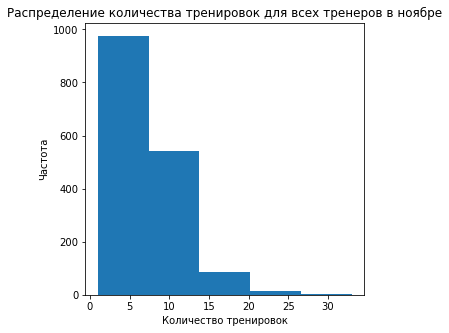

In [15]:
plt.figure(figsize=(5,5))
plt.title('Распределение количества тренировок для всех тренеров в ноябре')
plt.xlabel('Количество тренировок')
plt.ylabel('Частота')
plt.hist(workouts_by_trainer['workouts'], bins=5)
plt.show()

#### Распределение количества тренировок в ноябре для тренеров различных отеделов

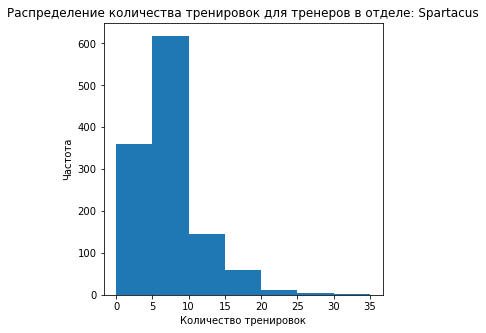

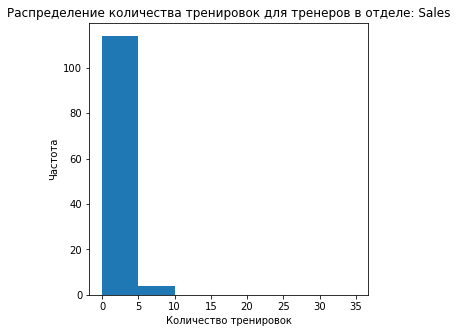

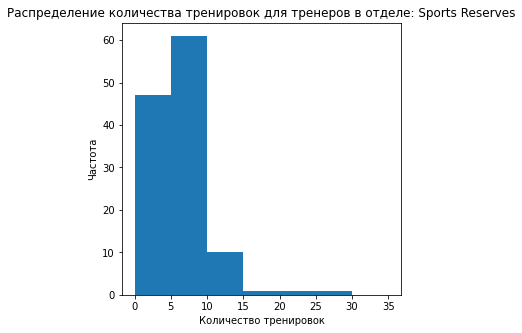

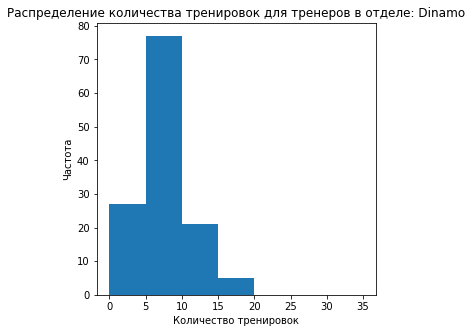

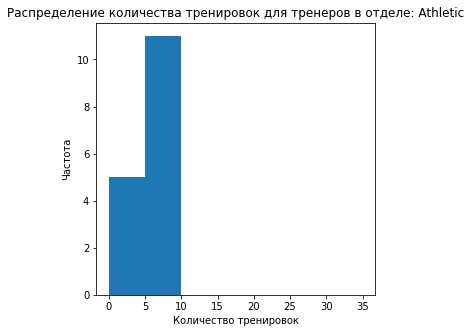

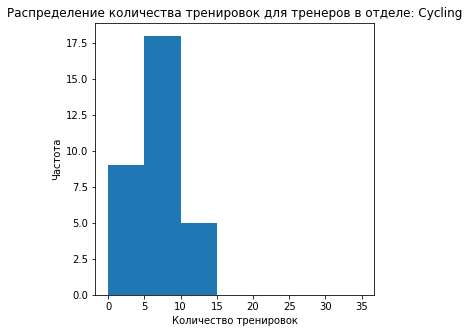

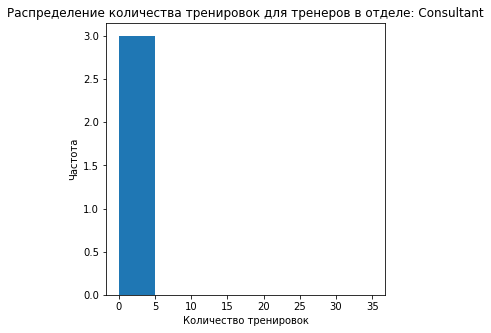

In [16]:
for department in list(workouts_by_trainer['trainer_department'].unique()):
    bins = list(range(0, 40, 5))
    plt.figure(figsize=(5,5))
    plt.title('Распределение количества тренировок для тренеров в отделе: ' + str(department))
    plt.xlabel('Количество тренировок')
    plt.ylabel('Частота')
    plt.hist(workouts_by_trainer[workouts_by_trainer['trainer_department'] == department]['workouts'], bins=bins)
    plt.show()

## Задание 4

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

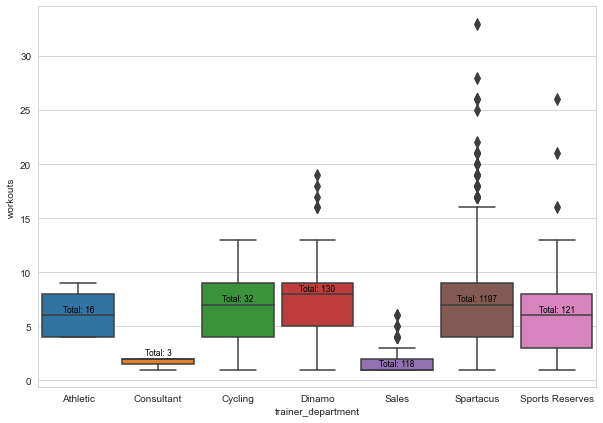

In [17]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

ax = sns.boxplot(x = 'trainer_department', y = 'workouts', 
                 order = ['Athletic', 'Consultant', 'Cycling', 'Dinamo', 'Sales', 'Spartacus', 'Sports Reserves'], 
                 data = workouts_by_trainer, fliersize=8, width = 0.9)

# Посчитаем медианные значения и количество тренировок в каждом отделе
medians = workouts_by_trainer.groupby(['trainer_department'])['workouts'].median().values
nobs = workouts_by_trainer.groupby(['trainer_department'])['workouts'].count().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ['Total: ' + i for i in nobs]
 
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.3, nobs[tick],
    horizontalalignment='center', size='small', color='k')

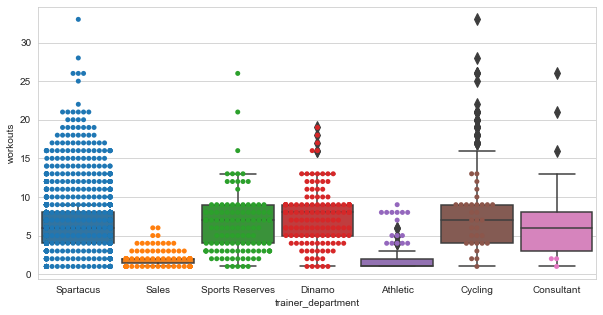

In [18]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(x = 'trainer_department', y = 'workouts', 
                 order = ['Athletic', 'Consultant', 'Cycling', 'Dinamo', 'Sales', 'Spartacus', 'Sports Reserves'], 
                 data = workouts_by_trainer, fliersize=8, width = 0.9)

ax = sns.swarmplot(x = 'trainer_department', y = 'workouts', data = workouts_by_trainer)

Можно видеть, что:
1. Крайне неравномерная загрузка наблюдалась в отделе Spartacus: здесь были тренеры с менее чем пятью тренировками, но при этом были тренеры с явной "перегрузкой".
2. В отделах Sports Reserves и Dinamo так же были тренеры с статистически "выпадающей" перегрузкой, но таковых было меньше чем в отеделе Spartacus.

## Задание 5


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на int
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму cost_age_data_agg, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - задай цвет на графике
    
Подготовим данные:

In [19]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


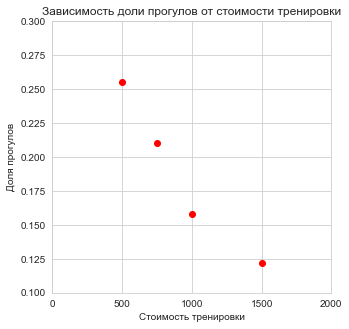

In [20]:
cost_data_agg = cost_age_data.groupby('cost')['status'].mean().reset_index()

plt.figure(figsize=(5,5))
plt.scatter(cost_data_agg['cost'], cost_data_agg['status'], color='r')
plt.title('Зависимость доли прогулов от стоимости тренировки')
plt.xlabel('Стоимость тренировки')
plt.ylabel('Доля прогулов')
plt.ylim(0.1, 0.3)

cost_scale = list(range(0, 2500, 500))
plt.xticks(cost_scale)

plt.show()

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму cost_age_data_agg, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - задай цвет на графике

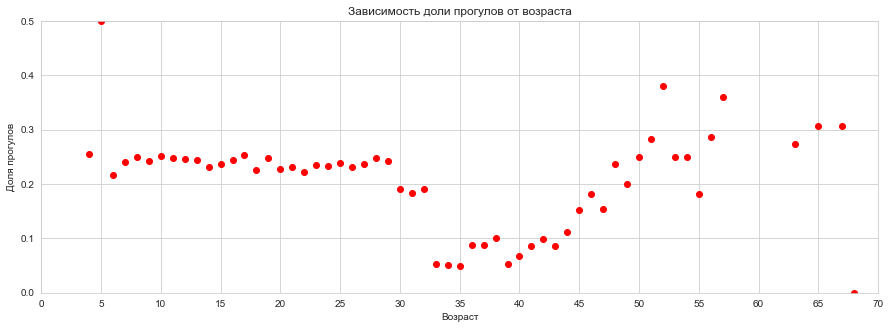

In [21]:
age_data_agg = cost_age_data.groupby('age')['status'].mean().reset_index()

plt.figure(figsize=(15,5))
plt.scatter(age_data_agg['age'], age_data_agg['status'], color='r')
plt.title('Зависимость доли прогулов от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доля прогулов')
plt.xlim(0, 70)
plt.ylim(0, 0.5)

age_scale = list(range(0, 75, 5))
plt.xticks(age_scale)

plt.show()

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной price_color. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - аргумент  с - цвета для разных цен
          

In [22]:
cost = list(set(cost_age_data_agg['cost']))
cost

[1000, 1500, 500, 750]

In [23]:
price_color = {500: 'c', 750:'g', 1000:'r', 1500:'b'}

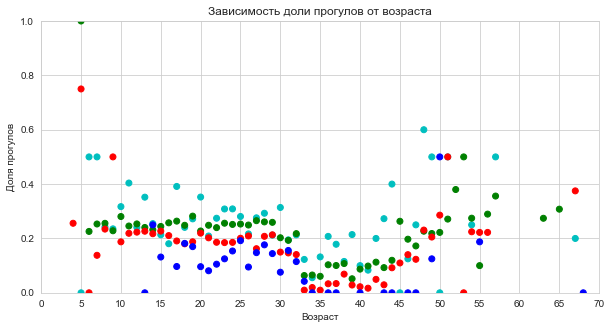

In [24]:
plt.figure(figsize=(10,5))

labels = list(price_color.keys())

plt.scatter(cost_age_data_agg['age'], cost_age_data_agg['status'], c=cost_age_data_agg['cost'].map(price_color))

plt.title('Зависимость доли прогулов от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доля прогулов')
plt.xlim(0, 70)
plt.ylim(0, 1)

age_scale = list(range(0, 75, 5))
plt.xticks(age_scale)

plt.show()

## Задание 6

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси X
    - подпись оси Y
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [25]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [26]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


In [27]:
pivot_table = cost_age_data_agg.pivot_table(index = 'age_bin', 
                                            columns = 'cost', 
                                            values = 'status')
pivot_table

cost,500,750,1000,1500
age_bin,,,,
0-20,0.286578,0.249445,0.206955,0.133663
21-25,0.283505,0.250124,0.190771,0.158784
26-30,0.255597,0.249445,0.191932,0.124706
31-35,0.165217,0.128114,0.069580,0.100313
36-40,0.175573,0.097115,0.035191,0.000000
41-45,0.191489,0.109646,0.067100,0.000000
46-50,0.285714,0.198748,0.171171,0.097561
50+,0.307692,0.296992,0.239130,0.176471


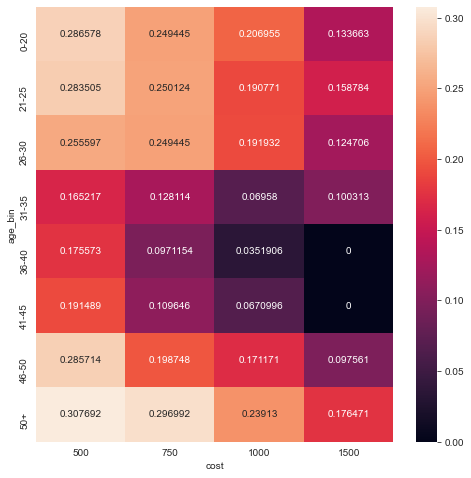

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(pivot_table, annot=True, fmt='g')
plt.show()

Можно видеть, что:
1. Доля "прогулов" снижается с увеличнием стоимости занятия.
2. Возраст влияет на долю прогулов нелинейно - минимальная доля "прогулов" наблюдается при возрасте с 31 до 45 лет. Посетители младше 31 и старше 45 пропускают тренировки чаще.